In [ ]:

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns

In [ ]:
!nvidia-smi

Wed Mar 26 21:34:50 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        On  | 00000000:02:00.0 Off |                  N/A |
| 38%   65C    P2             104W / 170W |   8416MiB / 12288MiB |    100%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!nvidia-smi | grep 'python' | awk '{ print $3 }' | xargs -n1 sudo kill -9 18885

[sudo] password for long: 
sudo: a password is required
^C


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train  = pd.read_csv('vectorized_train_balanced.csv')
# test  = pd.read_csv('/content/drive/MyDrive/data for news classification/vectorized_test_new.csv')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-03-27 10:03:42.047371: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-27 10:03:42.047426: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-27 10:03:42.047480: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-27 10:03:42.057984: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-27 10:03:43.117154: W tensorflow/compiler/

In [ ]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y,shuffle = True, test_size=0.2, random_state=20202)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)   # Now in range [0,09]
y_val = label_encoder.transform(y_val)




In [ ]:
X_train.shape[1]

2500

In [ ]:
set(y_val)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
del X,y

In [ ]:
del train

In [ ]:
tf.debugging.disable_traceback_filtering()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint(
    'only_vectorised/model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=0.0005)


model = Sequential()
model.add(Dense(4096, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers (6 in total)
model.add(Dense(2500, activation='relu'))
model.add(Dense(1250, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
# model.add(Dense(, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-03-26 13:35:46.361519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-26 13:35:46.569942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-26 13:35:46.571943: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=70,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, reduce_lr],
                    verbose = 1)



Epoch 1/100


2025-03-26 13:35:54.432346: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-03-26 13:35:54.629311: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f809403eee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-26 13:35:54.629408: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-03-26 13:35:54.659934: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-26 13:35:54.706753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-03-26 13:35:54.908937: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


384/386 [============================>.] - ETA: 0s - loss: 0.5686 - accuracy: 0.8186
Epoch 1: val_accuracy improved from -inf to 0.89929, saving model to only_vectorised/model.h5


/home/long/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


386/386 [==============================] - 17s 27ms/step - loss: 0.5672 - accuracy: 0.8190 - val_loss: 0.3671 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 2/100
383/386 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9408
Epoch 2: val_accuracy did not improve from 0.89929
386/386 [==============================] - 7s 19ms/step - loss: 0.2147 - accuracy: 0.9405 - val_loss: 0.3785 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 3/100
386/386 [==============================] - ETA: 0s - loss: 0.1060 - accuracy: 0.9713
Epoch 3: val_accuracy did not improve from 0.89929
386/386 [==============================] - 8s 20ms/step - loss: 0.1060 - accuracy: 0.9713 - val_loss: 0.4515 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 4/100
386/386 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9850
Epoch 4: val_accuracy did not improve from 0.89929
386/386 [==============================] - 8s 20ms/step - loss: 0.0563 - accuracy: 0.9850 - val_loss: 0.5598 - val_accur

In [ ]:
test = pd.read_csv('vectorized_test.csv')

In [ ]:
set(test.iloc[:,-1])

{'Chinh tri Xa hoi',
 'Doi song',
 'Khoa hoc',
 'Kinh doanh',
 'Phap luat',
 'Suc khoe',
 'The gioi',
 'The thao',
 'Van hoa',
 'Vi tinh'}

In [ ]:
from tensorflow.keras.models import load_model


model = load_model('/home/long/longdata/chúa phù hộ người tên khải/model_25_12_80_50.keras')

In [ ]:



X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

y_test = label_encoder.transform(y_test)
# Evaluate the model
pred_not_arg = model.predict(X_test)
pred = np.argmax(pred_not_arg,axis = 1)

In [ ]:
pd.DataFrame(pred).value_counts()

0
0    7958
7    6656
6    6550
8    6257
5    5506
3    5079
9    4405
4    3940
2    2171
1    1851
Name: count, dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()


0
0    7567
6    6716
7    6667
8    6250
5    5417
3    5276
9    4560
4    3788
2    2096
1    2036
Name: count, dtype: int64

In [ ]:
del test

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report




accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")


precision = precision_score(y_test, pred,average = 'weighted')
print(f"Precision: {precision}")
recall = recall_score(y_test, pred,average = 'weighted')
print(f"Recall: {recall}")
f1 = f1_score(y_test, pred,average = 'weighted')
print(f"{f1}")





list_metric = [accuracy,precision,recall, f1]

class_report = classification_report(y_test, pred)
print("clash royale")
print(class_report)


In [ ]:
list_metric

[0.9010779584301114,
 0.9014500228662894,
 0.9010779584301114,
 0.9009997698826618]

In [ ]:
class_labels = label_encoder.inverse_transform(np.unique(y_test))
cm = confusion_matrix(y_test, pred, labels=np.unique(y_test))
import seaborn as sns

def normalize_confusion_matrix(cm, norm='true'):
    with np.errstate(divide='ignore', invalid='ignore'):
        if norm == 'true':
            cm_normalized = cm.astype(float) / cm.sum(axis=1, keepdims=True)
        elif norm == 'pred':
            cm_normalized = cm.astype(float) / cm.sum(axis=0, keepdims=True)
        elif norm == 'all':
            cm_normalized = cm.astype(float) / cm.sum()
        else:
            raise ValueError("Unknown normalization type. Use 'true', 'pred', or 'all'.")
        cm_normalized = np.nan_to_num(cm_normalized)
    return cm_normalized

# class_labels = le.inverse_transform(np.unique(y_test))

plt.figure(figsize=(20, 15))
sns.heatmap(
    normalize_confusion_matrix(cm, norm='true'),
    annot=True, fmt=".2f", cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Normalized Confusion Matrix MLP of imbalanced dataset')
plt.show()

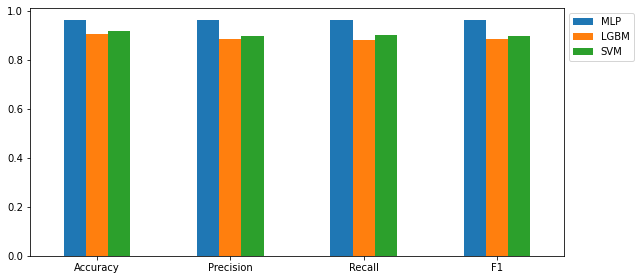

In [ ]:
mlp = [0.9621027137553848,
 0.9631583238703694,
 0.9621027137553848,
 0.9622934248321233]

lgbm =[0.9034204831953626,0.886, 0.88,0.883]
svm= [0.9166, 0.897, 0.899, 0.898]

index = ['Accuracy','Precision','Recall','F1']
df = pd.DataFrame({'MLP': mlp,
                   'LGBM': lgbm,
                   'SVM': svm}, index=index)


fig, ax = plt.subplots(figsize=(9, 4))
df.plot(kind='bar', ax=ax, rot=0)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [ ]:
df

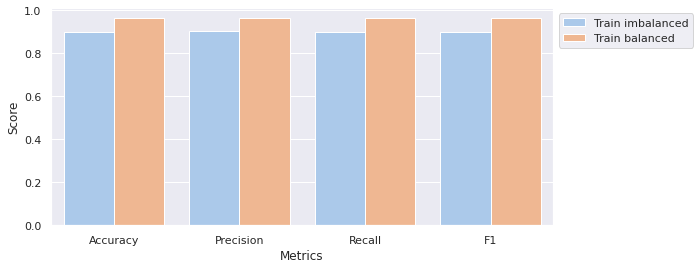

In [ ]:
train_b_new = [0.9010779584301114,
 0.9014500228662894,
 0.9010779584301114,
 0.9009997698826618]
train_b = [0.9621027137553848,
 0.9631583238703694,
 0.9621027137553848,
 0.9622934248321233]
index = ['Accuracy','Precision','Recall','F1']
df = pd.DataFrame({'Train ': train_b_new +train_b,
                   'model': ['Train imbalanced']*4 + ['Train balanced']*4, 'index':index*2})


fig, ax = plt.subplots(figsize=(9, 4))
# df.plot(kind='bar', ax=ax, rot=0)


sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(df, x="index", y="Train " , hue="model")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# sns.label(x="Metrics", y="Score", color="")

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")

# Show plot
plt.show()
# plt.tight_layout()
# plt.show()

[0.9602366347050999,
 0.9608086944455532,
 0.9602366347050999,
 0.9603183029040747]

 affine trên data balance và test bthg



 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7567
           1       0.88      0.96      0.92      2036
           2       0.91      0.95      0.93      2096
           3       0.96      0.94      0.95      5276
           4       0.94      0.98      0.96      3788
           5       0.97      0.97      0.97      5417
           6       0.98      0.94      0.96      6716
           7       0.99      0.99      0.99      6667
           8       0.97      0.96      0.97      6250
           9       0.97      0.97      0.97      4560

    accuracy                           0.96     50373
   macro avg       0.95      0.96      0.96     50373
weighted avg       0.96      0.96      0.96     50373

In [ ]:
# import numpy as np
# import plotly.graph_objects as go

# # Sample data: Replace these with actual values
# classes = np.arange(1, 11)  # 10 classes from 1 to 10
# precision = np.random.uniform(0.7, 1.0, 10)  # Precision values (random example)
# accuracy = np.random.uniform(0.7, 1.0, 10)   # Accuracy values
# f1_score = np.random.uniform(0.7, 1.0, 10)   # F1-score values

# # Define colors and labels
# metrics = {
#     "Precision": precision,
#     "Accuracy": accuracy,
#     "F1 Score": f1_score
# }
# colors = ["red", "green", "blue"]

# # Create the 3D figure
# fig = go.Figure()

# # Add each metric as a 3D line plot
# for i, (metric_name, values) in enumerate(metrics.items()):
#     fig.add_trace(go.Scatter3d(
#         x=classes,
#         y=[metric_name] * len(classes),  # Use metric name as categorical y-axis
#         z=values,
#         mode='lines+markers+text',
#         marker=dict(size=6, color=colors[i]),
#         line=dict(width=4, color=colors[i]),
#         text=[f"{v:.2f}" for v in values],  # Display values
#         textposition="top center",
#         name=metric_name
#     ))

# # Layout settings
# fig.update_layout(
#     title="3D Line Plot of Precision, Accuracy, and F1 Score",
#     scene=dict(
#         xaxis_title="Class",
#         yaxis_title="Metric",
#         zaxis_title="Value",
#         yaxis=dict(type="category"),  # Make y categorical
#     ),
#     margin=dict(l=0, r=0, b=0, t=40)
# )

# # Show plot
# # fig.show()
